In [16]:
import torch
import torchaudio
import torch
import torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import plotly.graph_objects as go

## Load wav file

In [7]:
path = "experiments/experiment_test.wav"
waveform, sample_rate = torchaudio.load(path)

In [12]:
test_wav = torchaudio.load(path)

## Functions for plotting waveform and spectrocgram

In [20]:
def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

Sample Rate: 44100
Shape: (1, 4268533)
Dtype: torch.float32
 - Max:      1.000
 - Min:     -1.000
 - Mean:    -0.000
 - Std Dev:  0.152

tensor([[0.0021, 0.0040, 0.0080,  ..., 0.0012, 0.0011, 0.0007]])



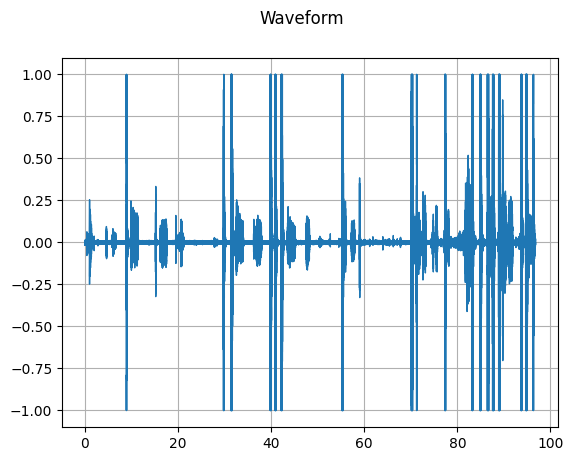

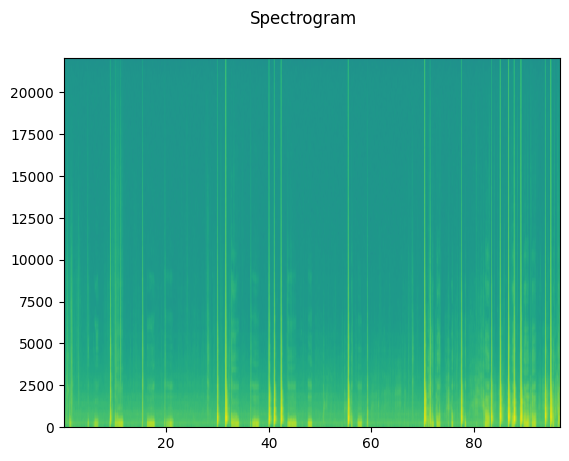

In [22]:
waveform, sample_rate = torchaudio.load(path)

print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)

In [40]:
# Get file info (sample rate, channels, frames, bitrate, encoding)
info = torchaudio.info(path)

# Get information from info
print(f"SAMPLE AUDIO FEATURES")
print(info)

SAMPLE AUDIO FEATURES
AudioMetaData(sample_rate=44100, num_frames=4268533, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [44]:
# Waveform is a tensor of audio samples with shape (channel, time)
waveform.shape, sample_rate

(torch.Size([1, 4268533]), 44100)

In [48]:
num_channels, num_frames = waveform.shape
length = num_frames / sample_rate
length

96.79213151927438

## AUDIO SPLICING

In [52]:
# Slice audio file

start = 29.76
end = 30.33

In [50]:
from pydub import AudioSegment
import math

/Users/rblc/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning:

Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work



In [55]:
t1 = start * 1000 #Works in milliseconds
t2 = end * 1000
newAudio = AudioSegment.from_wav(path)
newAudio = newAudio[t1:t2]
newAudio.export('newsound2.wav', format="wav") #Exports to a wav file in the current path.

<_io.BufferedRandom name='newsound2.wav'>